# shorturl.at/ADWX8

In [ ]:
from keras.datasets import cifar10
# X: imagen
# Y: etiquetas
((trainX, trainY), (testX, testY)) = cifar10.load_data()
trainX = trainX.astype("float") / 255.0
testX = testX.astype("float") / 255.0
trainX = trainX.reshape((trainX.shape[0], 3072))
testX = testX.reshape((testX.shape[0], 3072))

170498071/170498071 [==============================] - 2s 0us/step


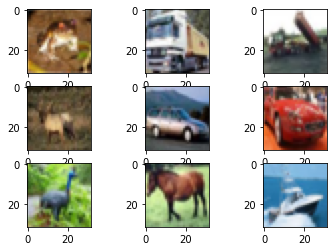

In [ ]:
import matplotlib.pyplot as plt
for i in range(9):
  plt.subplot(330+1+i)
  plt.imshow(trainX[i].reshape(32,32,3))
plt.show()

In [ ]:
from keras.utils import to_categorical
trainY = to_categorical(trainY)
testY = to_categorical(testY)
trainY

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.]], dtype=float32)

In [ ]:
from keras.models import Sequential
from keras.layers import Dense

model = Sequential()
model.add(Dense(1024, input_shape=(3072,), activation="relu"))
model.add(Dense(512, activation="relu"))
model.add(Dense(10, activation="softmax"))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 1024)              3146752   
                                                                 
 dense_1 (Dense)             (None, 512)               524800    
                                                                 
 dense_2 (Dense)             (None, 10)                5130      
                                                                 
Total params: 3,676,682
Trainable params: 3,676,682
Non-trainable params: 0
_________________________________________________________________


In [ ]:
from keras.optimizers import SGD
sgd = SGD(0.01) #learning rate

model.compile(loss="categorical_crossentropy", optimizer=sgd, metrics=["accuracy"] )

In [ ]:
H = model.fit(trainX, trainY, validation_data=(testX, testY), epochs=100, batch_size=32)

Epoch 1/3
1563/1563 [==============================] - 39s 25ms/step - loss: 1.3653 - accuracy: 0.5199 - val_loss: 1.4116 - val_accuracy: 0.4999
Epoch 2/3
1563/1563 [==============================] - 42s 27ms/step - loss: 1.2992 - accuracy: 0.5414 - val_loss: 1.3932 - val_accuracy: 0.5015
Epoch 3/3
1563/1563 [==============================] - 43s 28ms/step - loss: 1.2638 - accuracy: 0.5555 - val_loss: 1.4248 - val_accuracy: 0.4971


In [ ]:
predictions = model.evaluate(testX, testY)

313/313 [==============================] - 5s 17ms/step - loss: 1.4817 - accuracy: 0.4759


In [ ]:
from sklearn.metrics import confusion_matrix
predictions = model.predict(testX, batch_size=32)
confusion_matrix(testY.argmax(axis=1), 	predictions.argmax(axis=1))

313/313 [==============================] - 4s 12ms/step


array([[482,  14,  63,  16,  78,  35,  46,  85, 151,  30],
       [ 50, 456,  11,  24,  25,  35,  38,  75,  95, 191],
       [ 56,  13, 228,  57, 248, 105, 145, 120,  15,  13],
       [ 12,   8,  58, 207,  99, 257, 189, 115,  19,  36],
       [ 38,   6,  67,  20, 504,  67, 130, 141,  19,   8],
       [  8,   5,  60, 106, 100, 414, 134, 140,  16,  17],
       [  4,   7,  27,  28, 173,  50, 634,  56,  12,   9],
       [ 21,   6,  29,  30,  85,  75,  45, 666,  12,  31],
       [ 92,  32,  19,   8,  47,  56,  28,  38, 626,  54],
       [ 46,  92,  12,  32,  29,  34,  44,  97,  72, 542]])

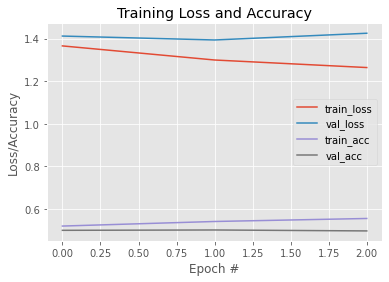

In [ ]:
import numpy as np 
plt.style.use("ggplot")
plt.figure()
plt.plot(np.arange(0, 3), H.history["loss"], label="train_loss")
plt.plot(np.arange(0, 3), H.history["val_loss"], label="val_loss")
plt.plot(np.arange(0, 3), H.history["accuracy"], label="train_acc")
plt.plot(np.arange(0, 3), H.history["val_accuracy"], label="val_acc")
plt.title("Training Loss and Accuracy")
plt.xlabel("Epoch #")
plt.ylabel("Loss/Accuracy")
plt.legend()

# Para la tarea
el model debe asemejarse a esto

In [ ]:
tarea = Sequential()
tarea.add(Dense(35, input_shape=(14,), activation="relu")) # una capa oculta con 35 neuronas y 14 neuronas de entrada
# add dense para segunda capa oculta
tarea.add(Dense(2, activation="softmax")) # capa de salida con 2 clases (retenido, no-retenido)

tarea.summary()